In [232]:
# You may add additional imports here
import random
import matplotlib.pyplot as plt
import csv

Question 1
==========

All parts of Question 1 use the _point-a-rally (PARS) scoring_ system.

**Question 1a:** Complete the following function so that it implements the PARS algorithm from the coursework specification.

**[Functionality: 7 marks]**

In [233]:
def game(ra, rb):
    score_a = 0
    score_b = 0
    probability_a = ra/(ra + rb)
    while True:
        rand_num = random.random()
        if rand_num > probability_a:
            score_b += 1
        else:
            score_a += 1

        if (score_a > 10 or score_b > 10) and (abs(score_a - score_b) > 1):
            break
    return score_a, score_b

        

    



**Testing:** If the random seed is set to 57, then calling the function with arguments `70` and `30` should return `(11,5)`.

In [234]:
random.seed(57)
print(game(70, 30))

(11, 5)


**Question 1b:** Complete the following function `win_probability_game(ra, rb, simulations)` to simulate `simulations` games in order to estimate the probability that a player with ability `ra` will win a game against a player of ability `rb`.

**[Functionality: 4 marks]**

In [235]:
def win_probability_game(ra, rb, simulations):
    a_wins = 0
    for val in range(simulations):
        score = game(ra, rb)
        if score[0] > score[1]:
            a_wins += 1
    return a_wins/simulations

**Testing:** Given sufficient simulations, calling the function with abilities `70` and `30` should give the answer `0.98` when printed to 2 decimal places.

In [236]:
# Print win_probability_game(70, 30) to 2 decimal places for a suitable value of n:
print(round(win_probability_game(70, 30,1000), 2))

0.98


**Question 1c:** Assume players abilities are given in a csv file with the format:
```
player a ability, player b ability,
60, 20,
100, 55,
50, 40,
20, 70,
95, 85,
```
Complete the following function to read in a specified csv file of this format and return a `list` of `tuple`s containing each pair of abilities.

**[Functionality: 4 marks]**

In [237]:
def read_abilities(file): # HINT: what should the argument be?
    ability_tup = []
    with open(file, mode = 'r') as ability_file:
        csvFile = csv.reader(ability_file)
        next(csvFile)
        for line in csvFile:
            ability_tup.append((int(line[0]), int(line[1])))
    return ability_tup

**Testing:** Calling the function to read the file `test.csv` from Learning Central should return `[(60, 20), (100, 55), (50, 40), (20, 70), (95, 85)]`

In [238]:
read_abilities("test.csv")# Print the result of calling the function for the file `test.csv`

[(60, 20), (100, 55), (50, 40), (20, 70), (95, 85)]

**Question 1d:** Write a function that takes a `list` of the format returned by your answer to 1c as an argument, and uses `matplotlib` to produce a plot (with labelled axes) showing the probability that player a beats player b (in a game) against `ra / r_b` for each pair.

**[Functionality: 5 marks]**

In [239]:
def plot_win_probabilities(output): # HINT: what should the argument be?
    x_vals = [] 
    y_vals = []
    for x in output:
        x_vals.append(x[0]/x[1])

    for y in output:
        y_vals.append(win_probability_game(y[0], y[1], 100))
    plt.scatter(x_vals, y_vals)
    plt.xlabel("ra/rb")
    plt.ylabel("Probability a wins")

**Testing:** The following figure (or similar) should result from the data `[(60, 20), (100, 55), (50, 40), (20, 70), (95, 85)]'

<img src="./win_probabilities.png" alt="Win probabilities" width="500">


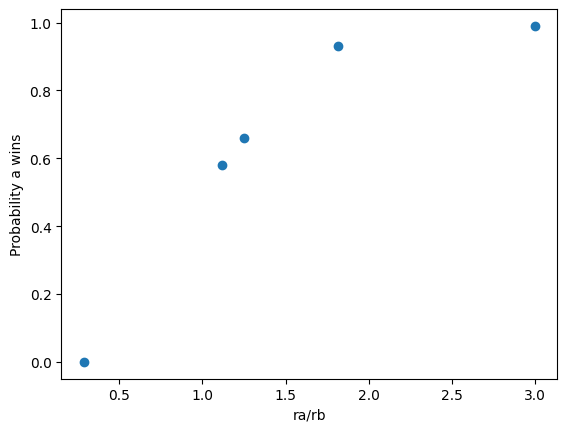

In [240]:
plot_win_probabilities(read_abilities("test.csv"))# Call the function to plot the figure here

**Question 1e:** Complete the following function `win_probability_match(ra, rb, simulations, m)` to simulate `simulations` matches which are won by the first player to win `m` games, and returns an estimate of the probability that a player with ability `ra` will win such a match against a player of ability `rb`.

Provide code that works out the smallest value of `m` such that `win_probability_match(60, 40, simulations, m)` is at least `0.9`. 

_HINT: make sure you use an appropriate value for `simulations`._

**[Functionality: 5 marks]**

In [241]:
def win_probability_match(ra, rb, simulations, m):
    a_match = 0
    b_match = 0

    for match in range(simulations):
        a_game = 0
        b_game = 0
        while a_game < m and b_game < m:
            score = game(ra, rb)
            if score[0] > score[1]:
                a_game +=1
            elif score[0] < score[1]:
                b_game +=1
        if a_game > b_game:
            a_match += 1
        elif a_game < b_game:
            b_match += 1
        
    
    p = (a_match/(a_match + b_match))
    return p

win_probability_match(60,40,1000,2)


0.932

Question 2
==========

Complete the remaining template of a scientific report that uses the results of simulation (with suitable input data) to investigate whether English or PARS is the ``better'' scoring method for squash matches. 

You should clearly state any assumptions you make, and may add any number of code cells. Guidance for completing the markdown/text cells is given in the coursework specification. The word count of the remaining markdown/text cells must be at most 750.

Your investigation should consider the relative ability of the two players (i.e. `ra/rb`) as the _independent variable_ and include appropriate figures that show how your choice of relevant _dependent variable_ varies. Your results **must** cover at least 50 different values of `ra/rb`.

Some starting points you may consider:
- How _fair_ is the scoring method - does the better player usually win? English - no, PARS - yes
- Shorter matches are usually preferable (e.g. for television) - if you assume each rally in a match takes equal time, how long do matches typically last?
- What effect does the relative ability of the two players have?

**[Report: 7 marks; Achievement: 8 marks]**

In [242]:
import random

def english_algo(ra,rb):
    
    points_a = 0
    points_b = 0
    a_serve = True
    rally = 0

    while (points_a < 9) and (points_b < 9):
        rally += 1
        probability = random.random()
        if a_serve:
            if probability < ra/(ra + rb):
                points_a += 1
                
            else:
                a_serve = False
    
        else:
            if probability < rb/(ra + rb):
                points_b += 1
                
            else:
                a_serve = True
       
        
    return points_a, points_b, rally
    

             
english_algo(0.6,0.4)
        

(9, 1, 20)

## Problem

This report investigates the 2 main scoring systems of squash: PARS and English, in an attempt to discern which of the 2 are superior. Superiority in this context can be measured through the following metrics: Duration and intensity of the game, as well as competitive balance (does the "better" player usually win?).

## Method

Testing the metrics outlined above can be done using simulated empirical data. A scatter plot can be used to model the average game length between English and PARS, and distribution of points to account for the difference in the way points are awarded. Both the PARS, and English game simulations consider the abilities of both players - and the competitive balance, and percieved service advantage can also be modelled using a scatter plot. For a given players ability ra and opponent's ability rb - the same values will be used to simulate games under both the PARS and English system to compare point distribution, and how the scoring systems influence the dynamics of the game. The simulations will consider players of varying abilities using randomly generated values of ra and rb. 

The following code is used to model the competitive balance of the 2 scoring systems. 100 values of ra, and rb are randomly generated and used to simulate 2000 games of squash using both scoring systems. The probability a wins each game is individually calculated, and plotted alongside the ratio of ra/rb (difference in abilities). 

In [243]:

import matplotlib

def win_probability_eng_game(ra, rb, simulations):
    a_wins = 0
    for val in range(simulations):
        score = english_algo(ra, rb)
        if score[0] > score[1]:
            a_wins += 1
    return a_wins/simulations #Calculating the percentage of games player a wins

def generate_abilities(): 
    pairs = [(random.randint(1, 100), random.randint(1, 100)) for _ in range(100)] #100 randomly simulated values for ra and rb
    return pairs



def plot_win_probabilities(output): 
    x_vals = [] 
    y_vals = []
    x_envals = []
    y_envals = []
    
    for x in output:
        x_vals.append(x[0]/x[1])

    for i in output:
        x_envals.append(i[0]/i[1])

    for j in output:
        y_envals.append(win_probability_eng_game(j[0], j[1], 2000)) #Simulates 2000 english games

    for y in output:
        y_vals.append(win_probability_game(y[0], y[1], 2000)) #Simulates 2000 PARS games

    fig, ax = plt.subplots()
    ax.scatter(x_vals, y_vals, label = "PARS")
    ax.scatter(x_envals, y_envals, label = "English", marker = "s", color = "r")
    plt.xlim(0,3)
    ax.set_xlabel("ra/rb")
    ax.set_ylabel("Probability a wins")
    ax.set_title("PARS vs English Competitive Balance")
    ax.legend()
    plt.show()

#plot_win_probabilities(generate_abilities())

The function Plot_Rallies is used to model the duration of each game with respect to the players's abilities. The rally counter is incremented as points are awarded or serves are played. At the end of each game, the number of rallies is calculated and added to an array which is then returned when the simulated number of games has been met. The number of rallies per game is then plotted alongside the respective ra, and rb values corresponding to each game. For the sake of conciseness, only 100 games were simulated.

In [244]:
def PAR_Game(ra,rb):
    score_a = 0
    score_b = 0
    probability_a = ra/(ra + rb)
    rally = 0
    while True:
        
        rand_num = random.random()
        if rand_num > probability_a:
            score_b += 1
            rally += 1
        else:
            score_a += 1
            rally += 1

        if (score_a > 10 or score_b > 10) and (abs(score_a - score_b) > 1):
            break
    return rally

def PAR_Rallies(ra,rb,simulations):
    rally_count_vals = []
    for _ in range(simulations):
        rally_count = PAR_Game(ra,rb)
        rally_count_vals.append(rally_count)

    return rally_count_vals

def Eng_Rallies(ra,rb,simulations):
    rally_count_vals = []
    for _ in range(simulations):
        rally_count = english_algo(ra,rb)[2]
        rally_count_vals.append(rally_count)

    return rally_count_vals

def Plot_Rallies(output):
    x_PAR = []
    x_eng = []
    y_PAR = []
    y_eng = []

    for xP in output:
        x_PAR.append(xP[0]/xP[1])
    
    for xE in output:
        x_eng.append(xE[0]/xE[1])

    for yP in output:
        y_PAR.append(PAR_Rallies(yP[0], yP[1], 1))

    for yE in output:
        y_eng.append(Eng_Rallies(yE[0], yE[1], 1))
    
    y_PAR_vals = [value for val in y_PAR for value in val]
    y_eng_vals = [value for val in y_eng for value in val]


    fig, ax = plt.subplots()
    ax.scatter(x_PAR, y_PAR_vals, label = "PARS")
    ax.scatter(x_eng, y_eng_vals, label = "English", marker = "s", color = "r")
    ax.set_xlabel("ra/rb")
    plt.xlim(0,5)
    ax.set_ylabel("No. of rallies/game")
    ax.set_title("PARS vs English Game Duration")
    ax.legend()
    plt.show()

#Plot_Rallies(generate_abilities())


## Assumptions

Simulated games relying on arbitrary player abilities do not reflect an actual player's stamina or fitness level. Therefore, it cannot account for decreasing stamina levels, nor varying playing styles such as defensive play intent on exhausting the opponent. Playing styles for PARS and the English system are very different; English rules allow a player to maintain a consistent lead over another player based on the way points are awarded per rally. This is not possible under PARS rules as ralleys are more offensive, and points are always awarded for winning service. A simulation can neither discern these differences in play, nor account for idiosyncrasies of humans such as stamina, or other health issues/quirks. A human player is also physically incapable of playing several games back to back with no breaks which the algorithms assume is feasible. 

## Results

![Alt text](image.png)

The graph appears to suggest that there is very little deviation between the English and PARS scoring systems. Player a appears to be equally likely to win a game when their opponent player b's abilities closely match theirs. Naturally, player a's prospects of winning a game increase as their ability outranks player b's. However, player a appears to have a very slight advantage if the scoring system is set to English and they are more adept than player b (ra/rb > 1). This may be because it is much easier to maintain a winning lead under English rules as points are only awarded to the server of each rally. Nevertheless, this slight advantage is difficult to replicate in actual matches since players are rarely significantly better than their opponent.

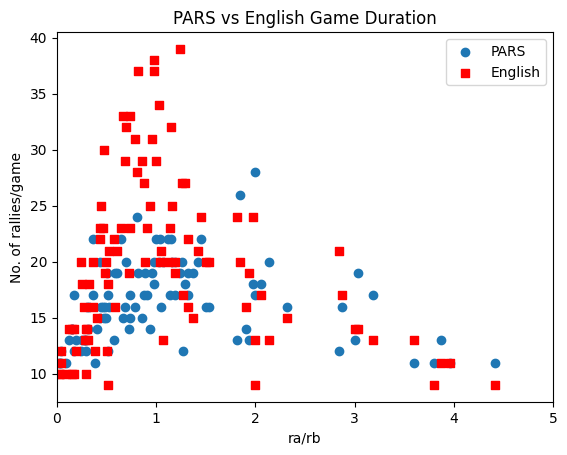

There is no clear linear correlation between the length of each game, and the abilities of both players. However, the data from both the PARS and English systems roughly resemble a bell curve. As ra/rb approaches 1, the data points rise upwards - suggesting that games last longer when the players are of similar ability. As ra/rb exceeds 1 the data points tend towards 0 which implies games are much shorter when one player is substantially better than the other. Despite all of this, the data trend for the PARS system is less steep - implying that game duration is generally more consistent than English ones. Assuming rallies take on average 2 minutes each, most PARS games finish within 25 - 45 minutes whereas an English game may vary from 20 - 80 minutes using the same logic. Naturally rallies are not consistent in duration, and will fluctuate with the players's stamina. Inspite this, English games are still likely to last longer than PARS ones - it is harder, and takes longer to score points as they are only awarded to the server (hence, the higher rally count). There appears to be little difference in game duration when ra/rb is greater than 2, however this is highly unrealistic in a professional context.  

## Conclusions

The results suggest that there is no significant differences between the 2 scoring systems and their impact on gameplay or likelihood of winning. Though it should be noted that longer games are regarded to be less entertaining, and can potentially impact a player's ability of winning a game.  From a theoretical standpoint, neither scoring system maintains a strong sense of superiority over the other. However, in reality game dynamics are less predictable, and shorter games are generally preferred over long ones. This primarily targets the English scoring system which has actually fallen out of favour in professional squash as a result.